In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

In [3]:
angle = 5
width = 640
height = 480
i=1
flr = {}
fll = {}

while angle*i < 90:
    theta = angle *i
    tan = math.tan(math.radians(theta))
    lr = np.array([[int(width/2)-1,height-1]])
    ll = np.array([[int(width/2)-1,height-1]])
    for iter in range(1,int(width/2)):
        for jter in range(1,height):
            test = np.abs([tan-jter/iter])
            if test[0]<0.01:
                #print(str(iter) +' '+ str(480-jter+1))
                lr = np.append(lr,[[int(width/2+iter-1),height-jter+1-1]],axis=0)
                ll = np.append(ll,[[int(width/2-iter-1),height-jter+1-1]],axis=0)
                break
            else:
                if not jter==height-1: continue
                lr = np.append(lr,[[int(width/2+iter-1),lr[iter-1,1]]],axis=0)
                ll = np.append(ll,[[int(width/2-iter-1),ll[iter-1,1]]],axis=0)
    #print(lr.shape)
    flr[str(i)] = lr
    fll[str(i)] = ll
    i = i+1

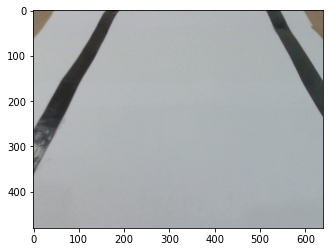

In [125]:
img = np.array(Image.open('image/img2.jpg'))
imshow(img)

In [126]:

lineR = {}
lineL = {}
for key in flr:
    line1 = np.empty([0],int)
    for point in flr[key]:
        line1 = np.append(line1,img[point[1],point[0],2])
    lineR[key] = line1
for key in fll:
    line2 = np.empty([0],int)
    for point in fll[key]:
        line2 = np.append(line2,img[point[1],point[0],2])
    lineL[key] = line2


In [149]:

def BND(s1 ,hd,h1,data):
    bound = np.empty([0],int)
    #checks = np.empty([0,2],int)
    a = 0
    b = s1
    plt.plot(range(0,len(data)),data,'k:')
    x = 0
    while True:
        cal = data[a:b]
        plus = np.sum(cal)/len(cal) + 3*np.std(cal)
        #print(plus)
        minus = np.sum(cal)/len(cal)-3*np.std(cal)
        #plt.plot(range(a,b),np.full([len(cal),2],[plus,minus]),'c')
        #print(plus,minus,np.mean(cal))
        #print(len(range(a,b)))
        #print(minus)
        if (b+hd) > len(data): hd = len(data) -b
        test = data[b:b+hd]
        #print(test)
        checktop = (test > plus) + (test<minus)
        #print(checktop)
        if True in checktop:
            bound = np.append(bound,[b + np.where(checktop)[0][0]])
            plt.plot(range(b,b+hd),np.full([hd,2],[plus,minus]),'c')

            #print(plus,minus,np.mean(cal))
        a = a+h1
        b = b+h1
        if b > len(data):
            #print()
            break
        x = x+1
    return bound

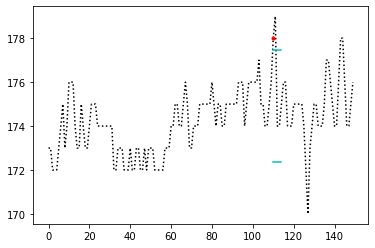

In [157]:
s1 =50
hd =5
h1 = 10
data = lineL['1'][0:150]
bound = BND(s1,hd,h1,data)
#plt.plot(range(0,len(data)),data,'k')
plt.plot(bound,[data[x] for x in bound],'r.')


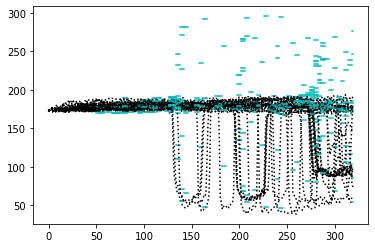

In [160]:
s1 =50
hd =5
h1 = 4
boundR = {}
boundL = {}

for key in lineR:
    boundR[key]= BND(s1,hd,h1,lineR[key])
for key in lineL:
    boundL[key]= BND(s1,hd,h1,lineL[key])


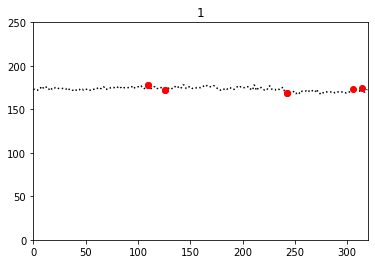

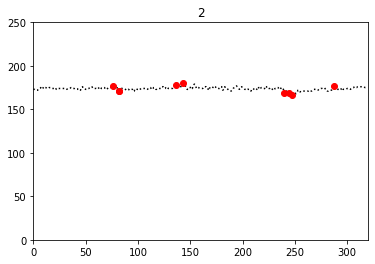

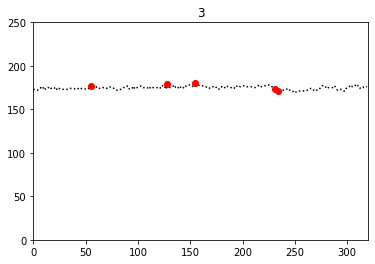

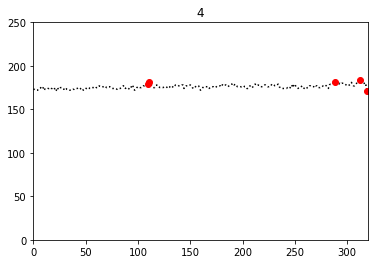

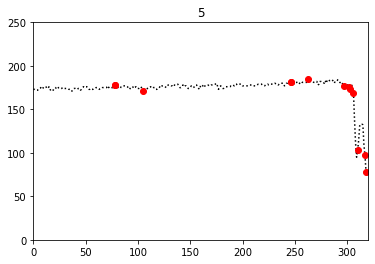

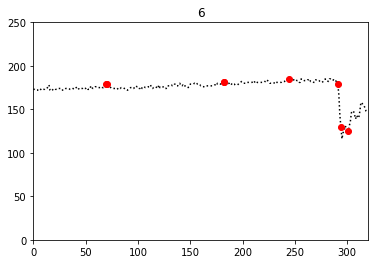

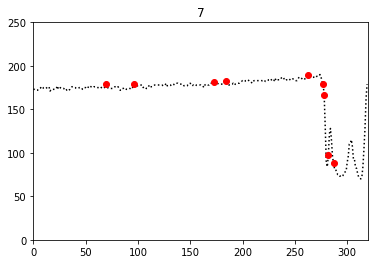

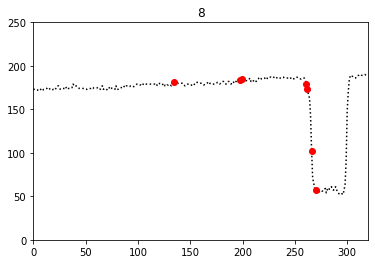

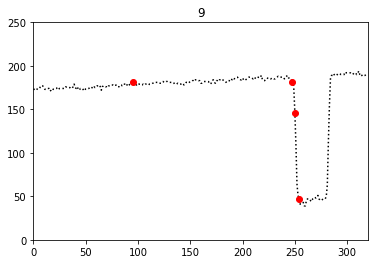

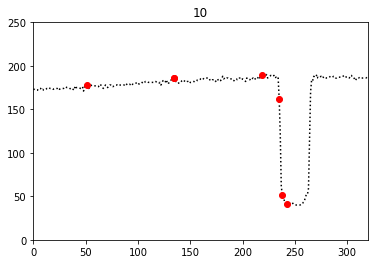

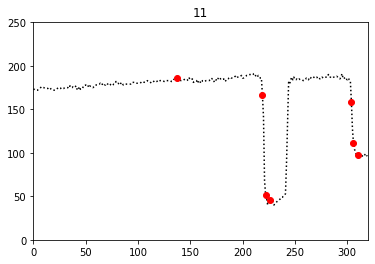

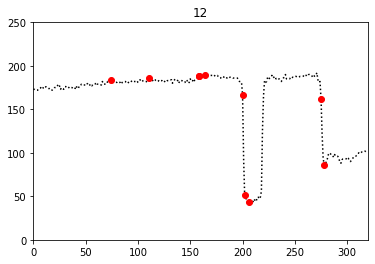

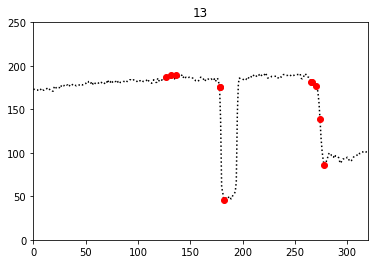

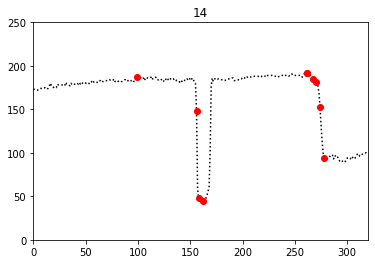

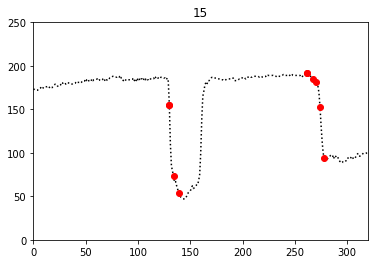

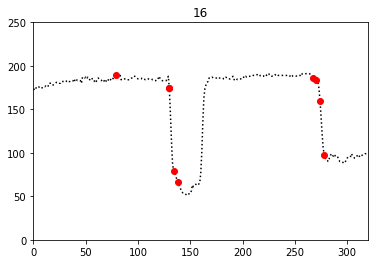

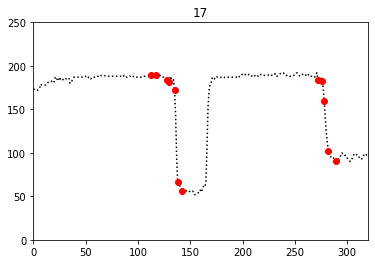

In [161]:
for key in lineR:
    plt.axis([0,320,0,250])
    plt.title(key)
    plt.plot(range(0,len(lineL[key])),lineL[key],'k:')
    plt.plot(boundL[key],[lineL[key][a] for a in boundL[key]],'ro')
    plt.show()
#plt.axis([0,320,0,250])
#plt.plot(range(0,len(line2)),line2,'k')
#plt.plot(bound2,[line2[a] for a in bound2],'r.')
#plt.show()

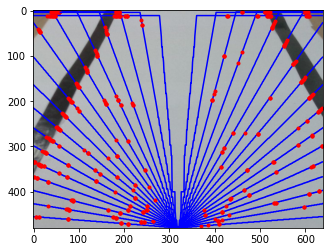

In [135]:
imshow(img)
for key in flr:
    plt.plot(flr[key][:,0],flr[key][:,1],'b')
    plt.plot(fll[key][:,0],fll[key][:,1],'b')
    if not boundR[key].shape == [0]:
        #print(boundR[key].shape)
        plt.plot(boundR[key]+int(640/2-1),[flr[key][x,1] for x in boundR[key]],'r.')
    if not boundL[key].shape == [0]:
        plt.plot(int(640/2-1)-boundL[key],[fll[key][x,1] for x in boundL[key]],'r.')
    


In [136]:
print(bound)

[110 110]


In [156]:
example1 = np.array([1,2,3,4,5,6,7,8])
b =2
example2 = (example1 >= 5) + (example1 <= 1)
a = b+np.where(example2)[0]
print(a)
if True in example2:
    print(True)

[2 6 7 8 9]
True
